In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'svg'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'RTpcX0dpdEh1YlxhcmFuYXVyLnJiaW5kLmlvXGxlY3R1cmVzXG1tX2JpZ19kYXRhXHNsaWRlc1wyMDI1'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

C:\Users\ihorm\AppData\Local\Temp\ipykernel_36468\3511698350.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Python\\Python311\\Lib\\importlib\\_bootstrap.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\importlib\\_bootstrap_external.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\zipimport.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\codecs.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\encodings\\aliases.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\encodings\\__init__.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\encodings\\utf_8.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\encodings\\cp1252.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\abc.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\io.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\stat.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\_collections_abc.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\genericpath.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\ntpath.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\os.py": 1686106818.0, "C:\\Python\\Python311\\Lib\\_sitebuiltins.py": 1686106818.0, "C:\\Users\\ihorm\\App

In [2]:
#| label: setup
#| include: false

# Import libraries
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random
import pandas as pd

import sys

from IPython.display import Markdown
from tabulate import tabulate

# Define colors
red_pink   = "#e64173"
turquoise  = "#20B2AA"
orange     = "#FFA500"
red        = "#fb6107"
blue       = "#181485"
navy       = "#150E37FF"
green      = "#8bb174"
yellow     = "#D8BD44"
purple     = "#6A5ACD"
slate      = "#314f4f"

In [3]:
#| eval: false

from pathlib import Path
from zipfile import ZipFile
import requests

data_dir = Path("../data") # replace this with a directory of your choice
dest = data_dir / "flights.csv.zip"

if not dest.exists():
    r = requests.get(
        "https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2022_1.zip",
        verify=False,
        stream=True,
    )

    data_dir.mkdir(exist_ok=True)
    with dest.open("wb") as f:
        for chunk in r.iter_content(chunk_size=102400):
            if chunk:
                f.write(chunk)

    with ZipFile(dest) as zf:
        zf.extract(zf.filelist[0].filename, path=data_dir)

extracted = data_dir / "On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_1.csv"

In [4]:
#| eval: false
import gdown
import io
import polars as pl
import pandas as pd
import time

file_id = "1UApDVdpgyeeZbJTvgCIjMjumGv_tWeQi"
url = f"https://drive.google.com/uc?id={file_id}"

response = gdown.download(url, quiet=True, fuzzy=True)

In [5]:
#| include: false
import gdown
import io
import polars as pl
import pandas as pd
import time

response = "On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_1.csv"

In [6]:
pl.Config.set_tbl_rows(5)

start = time.time()
with open(response, 'rb') as f:
    df_pl = pl.read_csv(f, truncate_ragged_lines=True)
end = time.time()
print(f"Time taken: {end - start:.2f} seconds")

df_pl

Time taken: 0.18 seconds


Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,…,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,
i64,i64,i64,i64,i64,str,str,i64,str,str,i64,i64,i64,i64,str,str,str,i64,str,i64,i64,i64,i64,str,str,str,i64,str,i64,i64,str,f64,f64,f64,i64,str,f64,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
2022,1,1,14,5,"""2022-01-14""","""YX""",20452,"""YX""","""N119HQ""",4879,11066,1106606,31066,"""CMH""","""Columbus, OH""","""OH""",39,"""Ohio""",44,11278,1127805,30852,"""DCA""","""Washington, DC""","""VA""",51,"""Virginia""",38,1224,"""1221""",-3.0,0.0,0.0,-1,"""1200-1259""",28.0,…,null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""",null
2022,1,1,15,6,"""2022-01-15""","""YX""",20452,"""YX""","""N122HQ""",4879,11066,1106606,31066,"""CMH""","""Columbus, OH""","""OH""",39,"""Ohio""",44,11278,1127805,30852,"""DCA""","""Washington, DC""","""VA""",51,"""Virginia""",38,1224,"""1214""",-10.0,0.0,0.0,-1,"""1200-1259""",19.0,…,null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""",null
2022,1,1,16,7,"""2022-01-16""","""YX""",20452,"""YX""","""N412YX""",4879,11066,1106606,31066,"""CMH""","""Columbus, OH""","""OH""",39,"""Ohio""",44,11278,1127805,30852,"""DCA""","""Washington, DC""","""VA""",51,"""Virginia""",38,1224,"""1218""",-6.0,0.0,0.0,-1,"""1200-1259""",16.0,…,null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""",null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022,1,1,6,4,"""2022-01-06""","""DL""",19790,"""DL""","""N989AT""",1579,11057,1105703,31057,"""CLT""","""Charlotte, NC""","""NC""",37,"""North Carolina""",36,10397,1039707,30397,"""ATL""","""Atlanta, GA""","""GA""",13,"""Georgia""",34,1258,"""1257""",-1.0,0.0,0.0,-1,"""1200-1259""",15.0,…,null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""",null
2022,1,1,6,4,"""2022-01-06""","""DL""",19790,"""DL""","""N815DN""",1580,14869,1486903,34614,"""SLC""","""Salt Lake City, UT""","""UT""",49,"""Utah""",87,14057,1405702,34057,"""PDX""","""Portland, OR""","""OR""",41,"""Oregon""",92,2240,"""2231""",-9.0,0.0,0.0,-1,"""2200-2259""",10.0,…,null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""","""""",null,null,"""""",null,null,"""""","""""",null


In [7]:
pd.options.display.max_rows = 5

start = time.time()
with open(response, 'rb') as f:
    df_pd = pd.read_csv(f, on_bad_lines='skip')
end = time.time()
print(f"Time taken: {end - start:.2f} seconds")

df_pd

C:\Users\ihorm\AppData\Local\Temp\ipykernel_36468\239474130.py:5: DtypeWarning:

Columns (76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.



Time taken: 1.90 seconds


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2022,1,1,14,5,2022-01-14,YX,20452,YX,N119HQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,1,1,15,6,2022-01-15,YX,20452,YX,N122HQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537900,2022,1,1,6,4,2022-01-06,DL,19790,DL,N989AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537901,2022,1,1,6,4,2022-01-06,DL,19790,DL,N815DN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
%%timeit

df_pl.select(["Dest", "Tail_Number"]).head(16).tail(4)

19.3 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [9]:
%%timeit
df_pl.select(pl.col(["Dest", "Tail_Number"]).gather(list(range(12, 16))))

77.2 µs ± 431 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [10]:
%%timeit
df_pl[12:16, ["Dest", "Tail_Number"]]

3.96 µs ± 24.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [11]:
%%timeit
df_pd.loc[12:15, ["Dest", "Tail_Number"]]

145 µs ± 632 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [12]:
%%timeit
(
    df_pl
    .filter(pl.col("IATA_CODE_Reporting_Airline").is_in(['AA', 'DL']))
    .select(["IATA_CODE_Reporting_Airline", "Dest", "Tail_Number"])
)

13 ms ± 50.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit
(
    df_pd
    .set_index("IATA_CODE_Reporting_Airline")
    .loc[['AA', 'DL'], ["Dest", "Tail_Number"]]
)

142 ms ± 2.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
df_pl[[0, 1, 3], [0, 1]]

Year,Quarter
i64,i64
2022,1
2022,1
2022,1


In [15]:
df_pd.iloc[[0, 1, 3], [0, 1]]

,Year,Quarter
0,2022,1
1,2022,1
3,2022,1


In [16]:
def extract_city_name_pl() -> pl.Expr:
    """
    Chicago, IL -> Chicago for OriginCityName and DestCityName
    """
    cols = ["OriginCityName", "DestCityName"]
    return pl.col(cols).str.split(",").list.get(0)

In [17]:
def extract_city_name_pd(df: pd.DataFrame) -> pl.DataFrame:
    """
    Chicago, IL -> Chicago for OriginCityName and DestCityName
    """
    cols = ["OriginCityName", "DestCityName"]
    return df.assign(**{col: df[col].str.split(",", regex=False).str[0] for col in cols})

In [18]:
def time_col_pl(col: str) -> pl.Expr:
    col_expr = pl.col(col)
    return (
        pl.when(col_expr == "2400")
        .then(pl.lit("0000"))
        .otherwise(col_expr)
        .str.strptime(pl.Time, "%H%M", strict=True)
        .alias(col)
    )


def time_to_datetime_pl(columns: list[str]) -> list[pl.Expr]:
    """
    Combine all time items into datetimes.

    2014-01-01,0914 -> 2014-01-01 09:14:00
    """
    date_col = pl.col("FlightDate")
    return [
        date_col
        .dt.combine(time_col_pl(col))
        .alias(col)
        for col in columns
    ]

In [19]:
def time_col_pd(col: str, df: pd.DataFrame) -> pd.Series:
    timepart = df[col].replace("2400", "0000")
    return pd.to_datetime(df["FlightDate"] + ' ' +
                            timepart.str.slice(0, 2) + ':' +
                            timepart.str.slice(2, 4),
                            errors='coerce')

def time_to_datetime_pd(df: pd.DataFrame, columns: list[str]) -> pd.DataFrame:
    '''
    Combine all time items into datetimes.

    2014-01-01,0914 -> 2014-01-01 09:14:00
    '''
    return df.assign(**{col: time_col_pd(col, df) for col in columns})

In [20]:
category_cols = [
    "Dest",
    "Tail_Number",
    "IATA_CODE_Reporting_Airline",
    "CancellationCode",
]
time_cols = ["DepTime", "ArrTime", "CRSArrTime", "CRSDepTime"]
cols = (
    category_cols
    + time_cols
    + [
        "FlightDate",
        "Flight_Number_Reporting_Airline",
        "OriginCityName",
        "DestCityName",
        "Origin",
        "DepDelay",
    ]
)

extracted = "On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_1.csv"

In [21]:
dtypes_pl = (
    {col: pl.Categorical for col in category_cols}
    | {"FlightDate": pl.Date}
    | {col: pl.Utf8 for col in time_cols}
)
df_pl = (
    pl.scan_csv(extracted, schema_overrides=dtypes_pl, null_values="")
    .select(cols)
    .with_columns([extract_city_name_pl(), *time_to_datetime_pl(time_cols)])
    .collect()
)
df_pl.head()

Dest,Tail_Number,IATA_CODE_Reporting_Airline,CancellationCode,DepTime,ArrTime,CRSArrTime,CRSDepTime,FlightDate,Flight_Number_Reporting_Airline,OriginCityName,DestCityName,Origin,DepDelay
cat,cat,cat,cat,datetime[μs],datetime[μs],datetime[μs],datetime[μs],date,i64,str,str,str,f64
"""DCA""","""N119HQ""","""YX""",null,2022-01-14 12:21:00,2022-01-14 13:56:00,2022-01-14 13:52:00,2022-01-14 12:24:00,2022-01-14,4879,"""Columbus""","""Washington""","""CMH""",-3.0
"""DCA""","""N122HQ""","""YX""",null,2022-01-15 12:14:00,2022-01-15 13:28:00,2022-01-15 13:52:00,2022-01-15 12:24:00,2022-01-15,4879,"""Columbus""","""Washington""","""CMH""",-10.0
"""DCA""","""N412YX""","""YX""",null,2022-01-16 12:18:00,2022-01-16 13:39:00,2022-01-16 13:52:00,2022-01-16 12:24:00,2022-01-16,4879,"""Columbus""","""Washington""","""CMH""",-6.0
"""DCA""","""N405YX""","""YX""",null,2022-01-17 12:17:00,2022-01-17 14:01:00,2022-01-17 13:52:00,2022-01-17 12:24:00,2022-01-17,4879,"""Columbus""","""Washington""","""CMH""",-7.0
"""DCA""","""N420YX""","""YX""",null,2022-01-18 12:18:00,2022-01-18 13:23:00,2022-01-18 13:52:00,2022-01-18 12:24:00,2022-01-18,4879,"""Columbus""","""Washington""","""CMH""",-6.0


In [22]:
dtypes_pd = (
    {col: pd.CategoricalDtype() for col in category_cols}
    | {col: pd.StringDtype() for col in time_cols}
)
df_pd = (
    pd.read_csv(extracted, dtype=dtypes_pd, usecols=cols, na_values="")
    .pipe(extract_city_name_pd)
    .pipe(time_to_datetime_pd, time_cols)
    .assign(FlightDate=lambda df: pd.to_datetime(df["FlightDate"]))
)
df_pd[cols].head()

,Dest,Tail_Number,IATA_CODE_Reporting_Airline,CancellationCode,DepTime,ArrTime,CRSArrTime,CRSDepTime,FlightDate,Flight_Number_Reporting_Airline,OriginCityName,DestCityName,Origin,DepDelay
0,DCA,N119HQ,YX,NaN,2022-01-14 12:21:00,2022-01-14 13:56:00,2022-01-14 13:52:00,2022-01-14 12:24:00,2022-01-14,4879,Columbus,Washington,CMH,-3.0
1,DCA,N122HQ,YX,NaN,2022-01-15 12:14:00,2022-01-15 13:28:00,2022-01-15 13:52:00,2022-01-15 12:24:00,2022-01-15,4879,Columbus,Washington,CMH,-10.0
2,DCA,N412YX,YX,NaN,2022-01-16 12:18:00,2022-01-16 13:39:00,2022-01-16 13:52:00,2022-01-16 12:24:00,2022-01-16,4879,Columbus,Washington,CMH,-6.0
3,DCA,N405YX,YX,NaN,2022-01-17 12:17:00,2022-01-17 14:01:00,2022-01-17 13:52:00,2022-01-17 12:24:00,2022-01-17,4879,Columbus,Washington,CMH,-7.0
4,DCA,N420YX,YX,NaN,2022-01-18 12:18:00,2022-01-18 13:23:00,2022-01-18 13:52:00,2022-01-18 12:24:00,2022-01-18,4879,Columbus,Washington,CMH,-6.0


<Axes: xlabel='DepTime'>

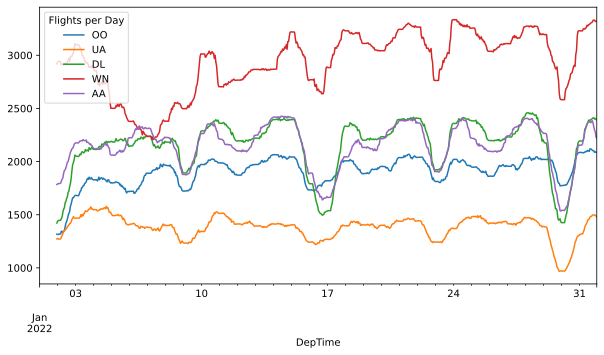

In [23]:
# filter for the busiest airlines
filter_expr = pl.col("IATA_CODE_Reporting_Airline").is_in(
    pl.col("IATA_CODE_Reporting_Airline")
    .value_counts(sort=True)
    .struct.field("IATA_CODE_Reporting_Airline")
    .head(5)
)
(
    df_pl
    .drop_nulls(subset=["DepTime", "IATA_CODE_Reporting_Airline"])
    .filter(filter_expr)
    .sort("DepTime")
    .group_by_dynamic(
        "DepTime",
        every="1h",
        group_by="IATA_CODE_Reporting_Airline")
    .agg(pl.col("Flight_Number_Reporting_Airline").count())
    .pivot(
        index="DepTime",
        on="IATA_CODE_Reporting_Airline",
        values="Flight_Number_Reporting_Airline",
    )
    .sort("DepTime")
    # fill every missing hour with 0 so the plot looks better
    .upsample(time_column="DepTime", every="1h")
    .fill_null(0)
    .select([pl.col("DepTime"), pl.col(pl.UInt32).rolling_sum(24)])
    .to_pandas()
    .set_index("DepTime")
    .rename_axis("Flights per Day", axis=1)
    .plot()
)

<Axes: xlabel='DepTime'>

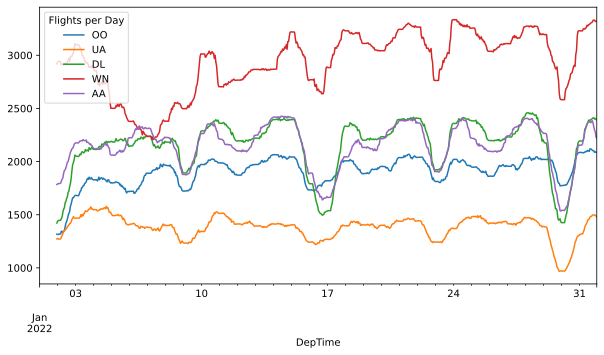

In [24]:
(
    df_pd
    .dropna(subset=["DepTime", "IATA_CODE_Reporting_Airline"])
    # filter for the busiest airlines
    .loc[
        lambda x: x["IATA_CODE_Reporting_Airline"].isin(
            x["IATA_CODE_Reporting_Airline"].value_counts().index[:5]
        )
    ]
    .assign(
        IATA_CODE_Reporting_Airline=lambda x: x[
            "IATA_CODE_Reporting_Airline"
        ].cat.remove_unused_categories()  #  annoying pandas behaviour
    )
    .set_index("DepTime")
    # TimeGrouper to resample & groupby at once
    .groupby(["IATA_CODE_Reporting_Airline", pd.Grouper(freq="h")])[
        "Flight_Number_Reporting_Airline"
    ]
    .count()
    # the .pivot takes care of this in the Polars code.
    .unstack(0)
    .fillna(0)
    .rolling(24)
    .sum()
    .rename_axis("Flights per Day", axis=1)
    .plot()
)